# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [58]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [142]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [60]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [61]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [62]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2325,0,43.0,25800.0,0,1
2399,0,37.0,27400.0,1,0
3097,1,29.0,53000.0,0,0
92,1,25.0,26700.0,1,0
1675,0,22.0,49000.0,3,0
1598,0,28.0,39800.0,1,0
396,1,24.0,47300.0,3,0
1945,1,31.0,36600.0,3,0
4284,1,25.0,40600.0,1,0
4511,0,42.0,49300.0,4,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [64]:
# let's change 'age' dtype to int64 though this is not critical
df['age'] = df['age'].astype(int)


In [65]:
# check to see that the conversion was successful

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Now that we have check the data, everything look fine. There are no missing values. 

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

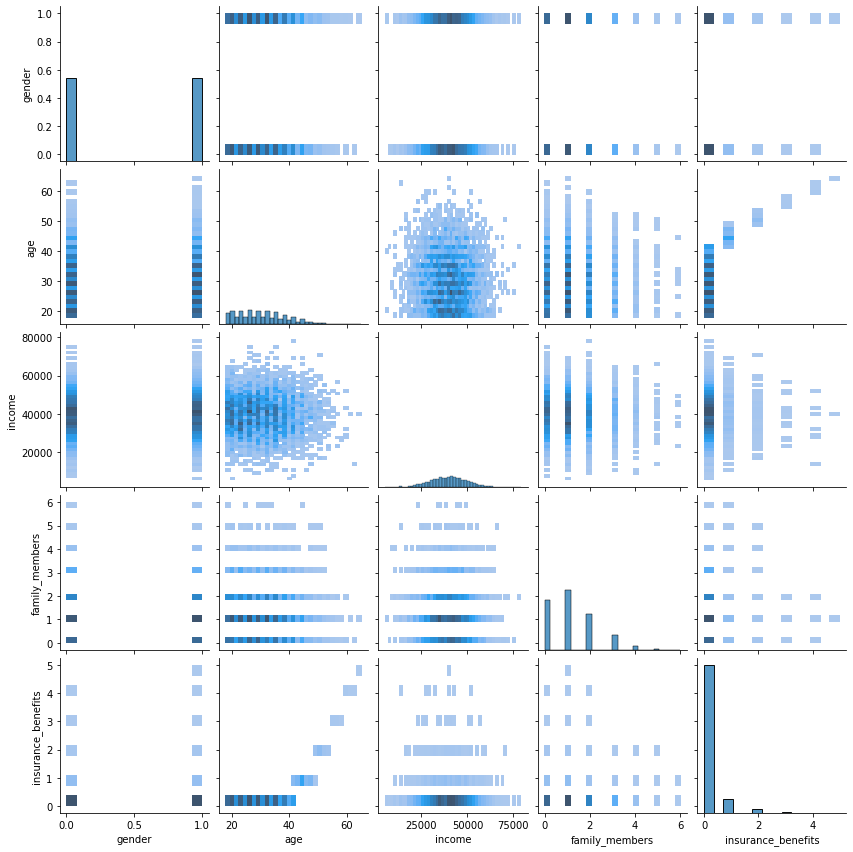

In [66]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [67]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [68]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors = k, algorithm = 'brute', metric = metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [69]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [70]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3809,1.0,0.430769,0.573418,0.000000,0
2814,0.0,0.553846,0.507595,0.166667,0
2751,1.0,0.369231,0.391139,0.166667,0
1821,1.0,0.584615,0.449367,0.166667,0
2180,0.0,0.600000,0.648101,0.333333,0


Now, let's get similar records for a given one for every combination

In [71]:
#not scaled, euclidean

print(get_knn(df, 10, 5, 'euclidean'))

      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0  0.000000
4039       1   25  36600.0               2                   0  1.000000
3247       1   26  36600.0               2                   0  1.414214
2037       1   26  36600.0               0                   0  1.414214
1949       0   24  36600.0               0                   0  1.732051


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [72]:
#not scaled, manhattan

print(get_knn(df, 10, 5, 'manhattan'))

      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0       0.0
4039       1   25  36600.0               2                   0       1.0
3247       1   26  36600.0               2                   0       2.0
2037       1   26  36600.0               0                   0       2.0
1508       0   26  36600.0               0                   0       3.0


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [73]:
#scaled, euclidean

print(get_knn(df_scaled, 10, 5, 'euclidean'))

      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4377     1.0  0.384615  0.473418        0.166667                   0  0.010127
760      1.0  0.369231  0.462025        0.166667                   0  0.015437
1389     1.0  0.369231  0.464557        0.166667                   0  0.015437
2254     1.0  0.400000  0.455696        0.166667                   0  0.017157


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [74]:
#scaled, manhattan

print(get_knn(df_scaled, 10, 5, 'manhattan'))

      gender       age    income  family_members  insurance_benefits  distance
10       1.0  0.384615  0.463291        0.166667                   0  0.000000
4377     1.0  0.384615  0.473418        0.166667                   0  0.010127
1389     1.0  0.369231  0.464557        0.166667                   0  0.016650
760      1.0  0.369231  0.462025        0.166667                   0  0.016650
2254     1.0  0.400000  0.455696        0.166667                   0  0.022980


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes the non-scaled data affect the KNN algorthm. Because I think that KNN relies on majority voting based on 'k' nearest samples for a given test point. Without normalization/scaling, all of the nearest neighbors might aligned in a certain direction which leads to incorrect classification. In this case, all of the 5 nearest neighbors identified had the exact same income, and with values ranging from 0 - ten thousands, this feature will dominate this model. 

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

Manhattan distance metric produced highly similar results with minor differences, regardless of the scaling. For example, in scaled df, the order of customer 1289 and 760 is flipped, while in non-scaled df, the fourth nearest neighbor is different. 

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [75]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [76]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

We see a class imbalance where 0 significantly outweights 1.

In [77]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [78]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [79]:
#dummy model
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size = len(df), seed = 42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



In [86]:
#split data
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis = 1)
target = df['insurance_benefits_received']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state = 54321)

print(features_train.shape,
     features_test.shape,
     target_train.shape,
     target_test.shape)

(3500, 4) (1500, 4) (3500,) (1500,)


In [87]:
#check knn model with non-scaled data
for k in range (1, 11, 1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, target_train)
    predict = knn.predict(features_test)
    f1_score = sklearn.metrics.f1_score(target_test, predict)
    print('F1 Score of k =', k, 'is:', f1_score)

F1 Score of k = 1 is: 0.6
F1 Score of k = 2 is: 0.4056603773584906
F1 Score of k = 3 is: 0.42424242424242425
F1 Score of k = 4 is: 0.16666666666666666
F1 Score of k = 5 is: 0.18478260869565216
F1 Score of k = 6 is: 0.048192771084337345
F1 Score of k = 7 is: 0.047619047619047616
F1 Score of k = 8 is: 0.012269938650306747
F1 Score of k = 9 is: 0.024242424242424242
F1 Score of k = 10 is: 0.024390243902439022


In [88]:
#check knn model with scaled data

scaler = StandardScaler()
features_train_1 = scaler.fit_transform(features_train)
features_test_1 = scaler.transform(features_test)


In [89]:
for k in range (1, 11, 1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train_1, target_train)
    predict = knn.predict(features_test_1)
    f1_score = sklearn.metrics.f1_score(target_test, predict)
    print('F1 Score of k =', k, 'is:', f1_score)

F1 Score of k = 1 is: 0.9430379746835443
F1 Score of k = 2 is: 0.9060402684563759
F1 Score of k = 3 is: 0.923076923076923
F1 Score of k = 4 is: 0.9078947368421053
F1 Score of k = 5 is: 0.923076923076923
F1 Score of k = 6 is: 0.8896321070234113
F1 Score of k = 7 is: 0.9055374592833876
F1 Score of k = 8 is: 0.8888888888888888
F1 Score of k = 9 is: 0.9120521172638436
F1 Score of k = 10 is: 0.8918918918918919


It appears that our KNN-based classifier worked better than a dummy model, and changing the k value had an impact on F1 scores. K=1 gave the highest F1 score (0.6). While scaling the data somehow generated a close to perfect fit for the data, with the highest F1 score being k=1, 0.94.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [90]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = ((np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y))

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis = 1)
        y_pred = X2.dot(self.weights)
        
        return y_pred

In [91]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [94]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [95]:
#scale

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)

In [96]:
#fit model

lr = MyLinearRegression()

lr.fit(X_train_1, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test_1)
eval_regressor(y_test, y_test_pred)

[ 0.14971429  0.30292778  0.0082117  -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.66


It appears that RMSE and R2 did not change between the non-scaled and scaled data. 

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [97]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [98]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [99]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [133]:
np.linalg.inv(P).dot(P)


array([[ 1.00000000e+00,  4.31984031e-18, -2.78054126e-16,
        -2.57000677e-16],
       [ 6.08293605e-17,  1.00000000e+00, -6.90868844e-17,
        -1.63138745e-16],
       [-5.61258920e-17,  3.19494738e-16,  1.00000000e+00,
         1.64271755e-18],
       [ 2.25584045e-18, -1.89983786e-18,  4.42459684e-17,
         1.00000000e+00]])

The matrix P is indeed invertible.

Can you guess the customers' ages or income after the transformation?

After the transformation, it would be difficult to guess the customers' ages or income, because they have became inverted, hard to guess what 4.31^-18 is for age, for example.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [138]:
#to find X'
X_t = X.dot(P)
X_recov = X_t.dot(np.linalg.inv(P))

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [139]:
X = pd.DataFrame(X)
X_t = pd.DataFrame(X_org)
X_recov = pd.DataFrame(X_recov)

print(X.iloc[2:5,:])
print(X_org.iloc[2:5,:])
print(X_recov.iloc[2:5,:])

     0     1        2    3
2  0.0  29.0  21000.0  0.0
3  0.0  21.0  41700.0  2.0
4  1.0  28.0  26100.0  0.0
             0             1             2             3
2  2693.117429   9486.397744   7808.831560  19484.860631
3  5345.603937  18803.227203  15479.148373  38663.061863
4  3347.176735  11782.829283   9699.998942  24211.273378
              0     1        2             3
2 -6.230214e-13  29.0  21000.0 -2.030327e-13
3 -1.089078e-12  21.0  41700.0  2.000000e+00
4  1.000000e+00  28.0  26100.0 -1.524242e-12


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Most values matched, I think the only difference might be due to rounding differences. 

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!


**Answer**

$w$ and $w_P$ related in a way that $w_P$ is simply $P^{-1}$$w$.


The predicted values with $w_P$ is $P^{-1}$$w$.

The quality of linear regression quality probably will not change since the predictions did not change. 

**Analytical proof**

To show how they related and the predicted value with $w_P$:


We have $w_P$ = $[(XP)^{T} XP]^{-1} (XP)^T y$


According to the Appendix: $(AB)^T = B^TA^T$


So now we have: $w_P$ = $(P^TX^T XP)^{-1} P^TX^T y$


Additionally: $(AB)^{-1} = B^{-1}A^{-1}$


So now: $w_P$ = $P^{-1}(X^T X)^{-1} (P^T)^{-1} P^TX^T y$


Additionally: $A^{-1}A = AA^{-1} = I$


So Now: $w_P$ = $P^{-1}(X^T X^{-1}) X^T y$


Finally: $P^{-1}$$w$


To predict:

let's say that we want to use $Xw$ to predict, and we get $b$ as a result, thus $b = Xw$  


and we know that: $X$ became $XP$


To check with $w_P$ we will use $b'$ to distinguish, thus: $b'$ = $XPP^{-1}w$

if: $w_P$ = $P^{-1}$$w$


Then: $b'$ = $Xw$


Finally, if: 


$b'$ = $Xw$     
                  =       
               $b = Xw$

Then: 

$b'$ =  $b$

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [140]:
#Split data again

features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis = 1)
target = df['insurance_benefits']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state = 54321)

print(features_train.shape,
     features_test.shape,
     target_train.shape,
     target_test.shape)

(3500, 4) (1500, 4) (3500,) (1500,)


In [144]:
#LinearRegression model

model = LinearRegression()
model.fit(features_train, target_train)
predict = model.predict(features_test)
print('The RMSE of original model is:', sklearn.metrics.mean_squared_error(target_test, predict))
print('R2 score of original model is:', sklearn.metrics.r2_score(target_test, predict))

The RMSE of original model is: 0.11076054219591674
R2 score of original model is: 0.41289541211894054


In [147]:
#Transform

#to have P the same size of column and rows as our data features
P = np.random.normal(size = (features_train.shape[1], features_train.shape[1]))

print(np.linalg.inv(P))

XP_train = features_train.dot(P)
XP_test = features_test.dot(P)

model.fit(XP_train, target_train)
predict_XP = model.predict(XP_test)

print('The RMSE of original model is:', sklearn.metrics.mean_squared_error(target_test, predict_XP))
print('R2 score of original model is:', sklearn.metrics.r2_score(target_test, predict_XP))

[[-0.73637296  0.15131633  0.0266605  -0.13762835]
 [-3.55789162  0.62720244 -1.601138    0.31035428]
 [-1.64091955 -0.77513091 -0.21809614 -0.82678221]
 [ 0.97141429  0.4088133  -0.22405497 -0.25874505]]
The RMSE of original model is: 0.11076054219593137
R2 score of original model is: 0.41289541211886305


Obfuscation did not affect our model, the difference beween r2 score and RMSE is very insignificant. 

# Conclusions

We found customers that are similar to a given customer using KNearestNeighbor, and found that scaling the data significantly improve the process, and the difference between Euclidean and Manhattan distance is minimal. 

We built a prediction model to predict whether a new customer is likely to receive an insurance benefit, we found that our model worked better than a dummy model. 

We predicted the number of insurance benefits a new customer is likely to receive using a linear regression model. 


Theoretically we proved that obfuscation does not affect the prediction formula. 


Finally, we confirmed that by testing it with models. 

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>